<a href="https://colab.research.google.com/github/xvoulis/TestCode2001/blob/main/DARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Εισαγωγή βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder


In [3]:
#Εισαγωγή του συνόλου των δεδομένων
url = 'https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv'
df = pd.read_csv(url)

#Εμφάνιση των πρώτων γραμμών του συνόλου δεδομένων
print("Πρώτες γραμμές του dataset:")
print(df.head())

#Έλεγχος διαστασεων του συνόλου δεδομένων
print(f"Διαστάσεις του dataset: {df.shape}")

Πρώτες γραμμές του dataset:
          Src_IP  Src_Port          Dst_IP  Dst_Port  Protocol  Flow_Duration  \
0  10.152.152.11     57158   216.58.220.99       443         6            229   
1  10.152.152.11     57159   216.58.220.99       443         6            407   
2  10.152.152.11     57160   216.58.220.99       443         6            431   
3  10.152.152.11     49134  74.125.136.120       443         6            359   
4  10.152.152.11     34697  173.194.65.127     19305         6       10778451   

   Total_Fwd_Packet  Total_Bwd_packets  Total_Length_of_Fwd_Packet  \
0                 1                  1                           0   
1                 1                  1                           0   
2                 1                  1                           0   
3                 1                  1                           0   
4               591                400                       64530   

   Total_Length_of_Bwd_Packet  ...  Active_Mean  Active_Std  Act

<ipython-input-3-8a3bbc012bd3>:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Περιγραφή δεδομένων:
           Src_Port      Dst_Port      Protocol  Flow_Duration  \
count  68580.000000  68580.000000  68580.000000   6.858000e+04   
mean   39726.052041  14235.135200     10.978798   2.405470e+07   
std    19362.966799  20255.302047      5.577292   4.049607e+07   
min        0.000000      0.000000      0.000000   0.000000e+00   
25%    32898.000000     80.000000      6.000000   1.225882e+05   
50%    45126.000000   4644.000000      6.000000   4.201030e+05   
75%    54712.000000  28326.000000     17.000000   2.716053e+07   
max    65534.000000  65533.000000     17.000000   1.200000e+08   

       Total_Fwd_Packet  Total_Bwd_packets  Total_Length_of_Fwd_Packet  \
count      68580.000000       68580.000000                6.858000e+04   
mean         291.265777         284.729513                2.286576e+05   
std         3399.455076        4873.361494                4.667583e+06   
min            1.000000           0.000000                0.000000e+00   
25%           

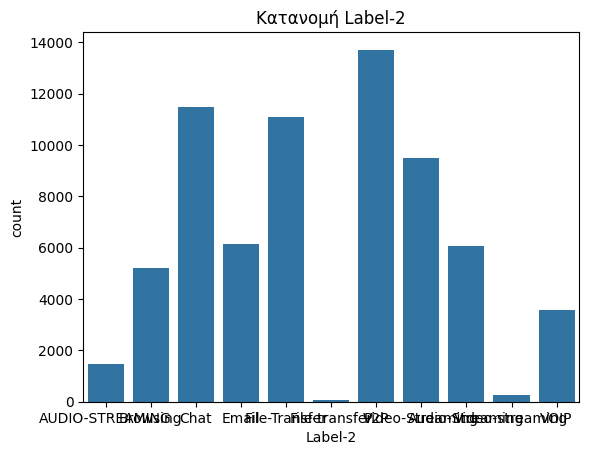

In [4]:
#Διερευνητική ανάλυση δεδομένων (EDA)
#Έπισκόπηση του dataset
print("Περιγραφή δεδομένων:")
print(df.describe())
#Έλεγχος για μηδενικές τιμές
print("Έλεγχος για κενά δεδομένα:")
print(df.isnull().sum())
#Γραφική παρουσίαση κατηγοριών (Tor/Non-Tor)
sns.countplot(x='Label-2', data=df)
plt.title("Κατανομή Label-2")
plt.show()


In [5]:
#Έλεγχος τύπου δεδομένων
print(df.dtypes)

Src_IP       object
Src_Port      int64
Dst_IP       object
Dst_Port      int64
Protocol      int64
             ...   
Idle_Std    float64
Idle_Max      int64
Idle_Min      int64
Label-1      object
Label-2      object
Length: 83, dtype: object


In [6]:
#Εντοπισμός κατηγορηματικών στηλών
categorical_columns = df.select_dtypes(include=['object']).columns

In [7]:
#Μετατροπή κατηγορηματικώνστηλών με Label Encoding
label_encoders = {}
for col in categorical_columns:
  df[col] = df[col].astype(str)#Μετατροπη όλων των τιμών σε συμβολοσειρές
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le



In [8]:
#Αφαιρέστε τυχον κενες τιμες
df[col].fillna('missing', inplace=True) #Προσθέστε κωδικοποιηση
df[col] = le.fit_transform(df[col])
label_encoders[col] = le

<ipython-input-8-0ca1042973cf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('missing', inplace=True) #Προσθέστε κωδικοποιηση


In [9]:
#Έλεγχος του ενημερωμένου Data frame
print(df.head())

   Src_IP  Src_Port  Dst_IP  Dst_Port  Protocol  Flow_Duration  \
0      11     57158    2377       443         6            229   
1      11     57159    2377       443         6            407   
2      11     57160    2377       443         6            431   
3      11     49134    3863       443         6            359   
4      11     34697    1175     19305         6       10778451   

   Total_Fwd_Packet  Total_Bwd_packets  Total_Length_of_Fwd_Packet  \
0                 1                  1                           0   
1                 1                  1                           0   
2                 1                  1                           0   
3                 1                  1                           0   
4               591                400                       64530   

   Total_Length_of_Bwd_Packet  ...  Active_Mean  Active_Std  Active_Max  \
0                           0  ...            0           0           0   
1                           0  .

In [10]:
#Διαχωρισμός χαρακτηριστικών (X) και στόχου (y)
#Αντιμετώπιση Nan τιμών στη στήλη Label-2 πριν από την
df['Label-2'] = df['Label-2'].astype(str)
df['Label-2'] = df['Label-2'].replace(r'^\s*$', np.nan, regex=True)
df = df.dropna(subset=['Label-2'])
X = df.drop(columns=['Label-2'])#Αφαιρούμε τη στήλη "Label-2"
y = df['Label-2'] #Η στηλη "Label-2" είναι ο στόχος

#Μετατροπή της ετικέτας σε αριθμητική μορφή
y = y.map({'Tor': 1, 'Non-Tor': 0}).fillna(-1).astype(int)

#
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

In [11]:
#Διαχωρισμός δεδομένων σε εκπαιδευτικό και επικυρωτικό σύνολο
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Εκπαιδευτικό σύνολο: {X_train.shape}")
print(f"Επικυρωτικό σύνολο: {X_test.shape}")

Εκπαιδευτικό σύνολο: (54864, 82)
Επικυρωτικό σύνολο: (13716, 82)


In [12]:
#Εκπαίδευση του μοντέλου
#Δημιουργία του μοντέλου Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

#Εκπαίδευση του μοντέλου
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
#Πρόβλεψη στο επικυρωτικό σύνολο
y_pred = model.predict(X_test)

In [14]:
#Αποτελέσματα αξιολόγησης
print("Αποτελέσματα:")
print("Ακρίβεια:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Αποτελέσματα:
Ακρίβεια: 1.0
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     13716

    accuracy                           1.00     13716
   macro avg       1.00      1.00      1.00     13716
weighted avg       1.00      1.00      1.00     13716



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


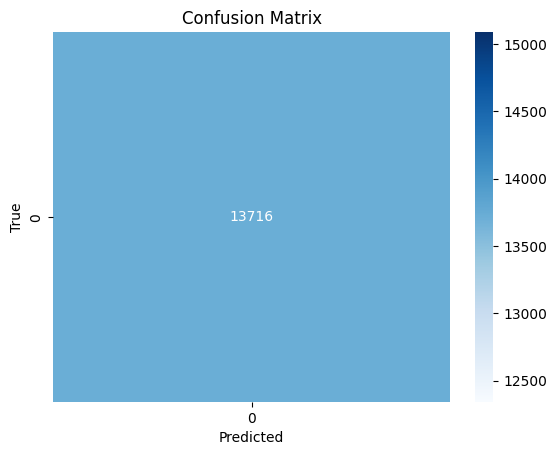

In [16]:
#Γράφημα σύγχυσης
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()